In [95]:
%load_ext autoreload
%autoreload 2

In [97]:
import time
import numpy as np
import numpy.linalg as LA
import random
from collections import deque
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
import generate_matrices
from generate_matrices import over_determined, hilbert, rand_for_given_cond_number

In [160]:
def Kaczmarz(A,f,x_0,N_max,eps,reg):
    x = np.copy(x_0)
    m = A.shape[0]
    n = A.shape[1]
    res = np.array([np.linalg.norm(A @ x - f)/np.linalg.norm(f)])
    norms = np.zeros(m)
    #calculate row norms in advance
    for i in range(m):
        norms[i] = np.linalg.norm(A[i,:])**2
    #Kaczmarz method itself
    np.random.seed(666)
    if reg == 0:
        print("no regularization")
        _lambda = np.ones(N_max)
    if reg == 1:
        print("constant regularization")
        _lambda = np.ones(N_max)*(1 + n/m)
    if reg == 2:
        print("random regularization")
        _lambda = 1 + np.random.rand(N_max)
    startTime = time.time()
    for i in range(N_max):
        k = i % m
        x = x + (_lambda[i]*(f[k] - np.dot(A[k,:],x))/norms[k])*A[k,:]
        #update residual
        new_res = np.linalg.norm(A @ x - f)/np.linalg.norm(f)
        res = np.append(res,[new_res])
        if new_res < eps:
            break
    endTime = time.time()
    return x,res,endTime-startTime

In [161]:
def SimpleRandomKaczmarz(A,f,x_0,N_max,eps):
    x = np.copy(x_0)
    m = A.shape[0]
    res = np.array([np.linalg.norm(A @ x - f)/np.linalg.norm(f)])
    norms = np.zeros(m)
    cum_norms = np.zeros(m)
    #calculate row norms in advance
    for i in range(m):
        norms[i] = np.linalg.norm(A[i,:])**2   
    np.random.seed(666)
    #just uniform distribution on the set of equations
    startTime = time.time()
    for i in range(N_max):
        k = np.random.randint(m)
        x = x + ((f[k] - np.dot(A[k,:],x))/norms[k])*A[k,:]
        #update residual
        new_res = np.linalg.norm(A @ x - f)/np.linalg.norm(f)
        res = np.append(res,[new_res])
        if new_res < eps:
            break
    endTime = time.time()
    return x,res,endTime-startTime

In [173]:
def RandomKaczmarz(A,f,x_0,N_max,eps,reg):
    x = np.copy(x_0)
    m = A.shape[0]
    n = A.shape[1]
    res = np.array([np.linalg.norm(A @ x - f)/np.linalg.norm(f)])
    norms = np.zeros(m)
    cum_norms = np.zeros(m)
    #calculate row norms in advance
    for i in range(m):
        norms[i] = np.linalg.norm(A[i,:])**2   
    cum_norms = np.cumsum(norms)
    cum_norms /= cum_norms[len(cum_norms)-1]
    np.random.seed(666)
    if reg == 0:
        print("no regularization")
        _lambda = np.ones(N_max)
    if reg == 1:
        print("constant regularization")
        _lambda = np.ones(N_max)*(1 + n/m)
    if reg == 2:
        print("random regularization")
        _lambda = 1 + np.random.rand(N_max)
    startTime = time.time()
    #Follow Strohmer, Vershinin
    for i in range(N_max):
        r = np.random.rand()
        k = np.searchsorted(cum_norms,r)
        x = x + (_lambda[i]*(f[k] - np.dot(A[k,:],x))/norms[k])*A[k,:]
        #update residual
        new_res = np.linalg.norm(A @ x - f)/np.linalg.norm(f)
        res = np.append(res,[new_res])
        if new_res < eps:
            break
    endTime = time.time()
    return x,res,endTime-startTime

System with matrix from normal distribution

In [164]:
np.random.seed(666)
n = 500
m = 100
A = rand_for_given_cond_number(n,m, cond = 200)
true_vect = np.random.rand(m)
values = A @ true_vect
x_0 = np.random.rand(m)

not full rank
sing_vals: [ 200.          197.98989899  195.97979798  193.96969697  191.95959596
  189.94949495  187.93939394  185.92929293  183.91919192  181.90909091
  179.8989899   177.88888889  175.87878788  173.86868687  171.85858586
  169.84848485  167.83838384  165.82828283  163.81818182  161.80808081
  159.7979798   157.78787879  155.77777778  153.76767677  151.75757576
  149.74747475  147.73737374  145.72727273  143.71717172  141.70707071
  139.6969697   137.68686869  135.67676768  133.66666667  131.65656566
  129.64646465  127.63636364  125.62626263  123.61616162  121.60606061
  119.5959596   117.58585859  115.57575758  113.56565657  111.55555556
  109.54545455  107.53535354  105.52525253  103.51515152  101.50505051
   99.49494949   97.48484848   95.47474747   93.46464646   91.45454545
   89.44444444   87.43434343   85.42424242   83.41414141   81.4040404
   79.39393939   77.38383838   75.37373737   73.36363636   71.35353535
   69.34343434   67.33333333   65.32323232   63.31313

Test regularization impact here

In [165]:
eps = 1e-10
N_max = 50000
x_Car,res_Car,t_Car = Kaczmarz(A,values,x_0,N_max,eps,reg = 0)
x_RegCar,res_RegCar,t_RegCar = Kaczmarz(A,values,x_0,N_max,eps, reg = 1)
x_RandRegCar,res_RandRegCar,t_RandRegCar = Kaczmarz(A,values,x_0,N_max,eps, reg = 2)

no regularization
constant regularization
random regularization


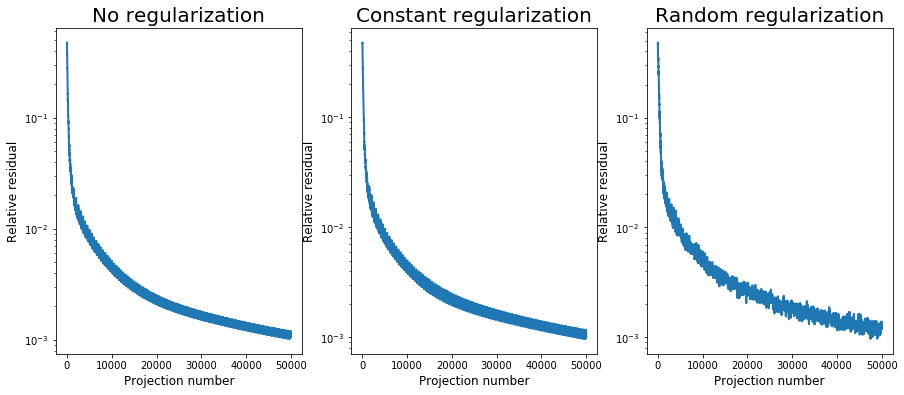

In [166]:
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.plot(res_Car, linestyle = '-', linewidth = 2.0)
plt.title('No regularization', fontsize = 20)
plt.ylabel('Relative residual', fontsize = 12)
plt.xlabel('Projection number', fontsize = 12)
plt.yscale('log')
plt.subplot(132)
plt.plot(res_RegCar, linestyle = '-', linewidth = 2.0, label='Regularized Kaczmarz')
plt.title('Constant regularization', fontsize = 20)
plt.ylabel('Relative residual', fontsize = 12)
plt.xlabel('Projection number', fontsize = 12)
plt.yscale('log')
plt.subplot(133)
plt.plot(res_RandRegCar, linestyle = '-', linewidth = 2.0, label='Randomly regularized Kaczmarz')
plt.title('Random regularization', fontsize = 20)
plt.ylabel('Relative residual', fontsize = 12)
plt.xlabel('Projection number', fontsize = 12)
plt.yscale('log')
plt.show()

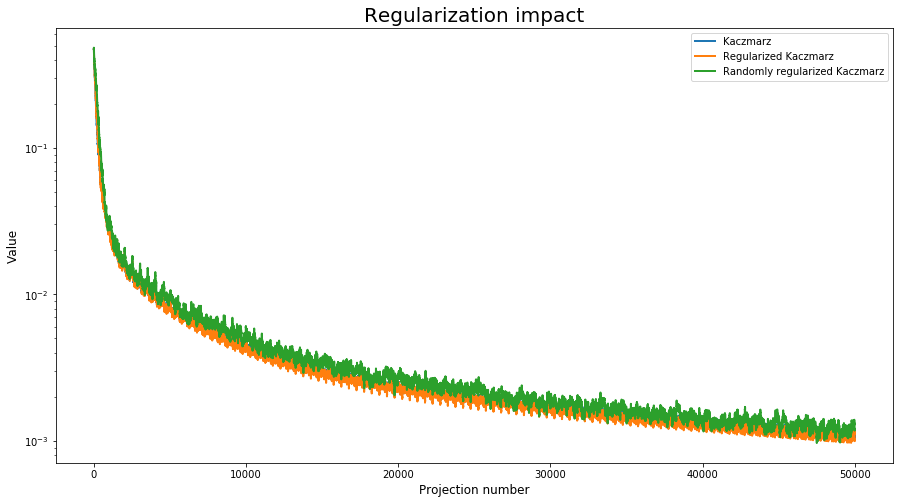

In [168]:
plt.figure(figsize=(15,8))
plt.plot(res_Car, linestyle = '-', linewidth = 2.0, label='Kaczmarz')
plt.plot(res_RegCar, linestyle = '-', linewidth = 2.0, label='Regularized Kaczmarz')
plt.plot(res_RandRegCar, linestyle = '-', linewidth = 2.0, label='Randomly regularized Kaczmarz')
plt.title('Regularization impact', fontsize = 20)
plt.ylabel('Value', fontsize = 12)
plt.xlabel('Projection number', fontsize = 12)
plt.yscale('log')
plt.legend()
plt.show()

As we see, random regularization does not work properly in this case, but note that constant multiplier $\lambda = 1 + \frac{n}{m}$, where $A \in \mathbb{R}^{m \times n}, m \geq n$, is competitive, probably it should be tested with randomness.

In [174]:
eps = 1e-10
N_max = 50000
x_Car,res_Car,t_Car = RandomKaczmarz(A,values,x_0,N_max,eps,reg = 0)
x_RegCar,res_RegCar,t_RegCar = RandomKaczmarz(A,values,x_0,N_max,eps, reg = 1)
x_RandRegCar,res_RandRegCar,t_RandRegCar = RandomKaczmarz(A,values,x_0,N_max,eps, reg = 2)

no regularization
constant regularization
random regularization


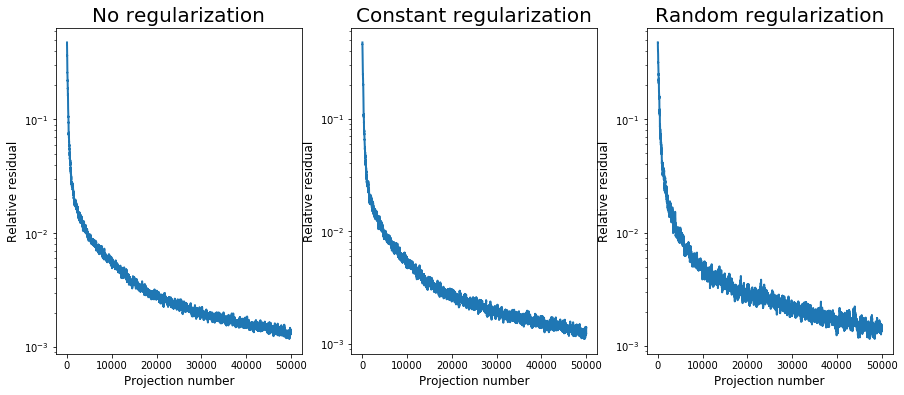

In [175]:
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.plot(res_Car, linestyle = '-', linewidth = 2.0)
plt.title('No regularization', fontsize = 20)
plt.ylabel('Relative residual', fontsize = 12)
plt.xlabel('Projection number', fontsize = 12)
plt.yscale('log')
plt.subplot(132)
plt.plot(res_RegCar, linestyle = '-', linewidth = 2.0, label='Regularized Kaczmarz')
plt.title('Constant regularization', fontsize = 20)
plt.ylabel('Relative residual', fontsize = 12)
plt.xlabel('Projection number', fontsize = 12)
plt.yscale('log')
plt.subplot(133)
plt.plot(res_RandRegCar, linestyle = '-', linewidth = 2.0, label='Randomly regularized Kaczmarz')
plt.title('Random regularization', fontsize = 20)
plt.ylabel('Relative residual', fontsize = 12)
plt.xlabel('Projection number', fontsize = 12)
plt.yscale('log')
plt.show()

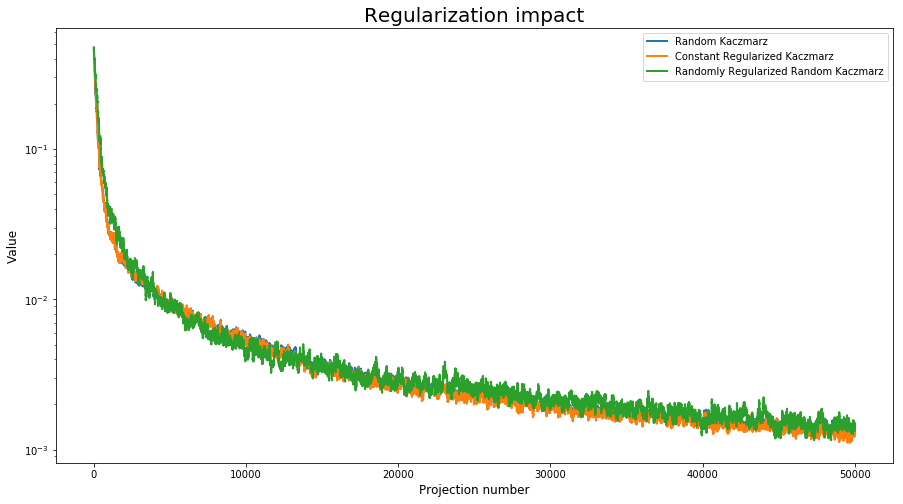

In [177]:
plt.figure(figsize=(15,8))
plt.plot(res_Car, linestyle = '-', linewidth = 2.0, label='Random Kaczmarz')
plt.plot(res_RegCar, linestyle = '-', linewidth = 2.0, label='Constant Regularized Kaczmarz')
plt.plot(res_RandRegCar, linestyle = '-', linewidth = 2.0, label='Randomly Regularized Random Kaczmarz')
plt.title('Regularization impact', fontsize = 20)
plt.ylabel('Value', fontsize = 12)
plt.xlabel('Projection number', fontsize = 12)
plt.yscale('log')
plt.legend()
plt.show()

Now compare methods on well-conditioned overdetermined matrix from Fourier transformation

In [ ]:
#sample size
m = 700
r = 50
n = 2*r + 1
np.random.seed(666)
dots = np.random.rand(m)
sorted_dots = np.sort(dots)
true_coef = np.random.randn(n)
#we want Fourier coefficients to decrease as 1/n
for i in range(r):
    true_coef[r+i+1] = true_coef[r+i+1]/(i+1)
    true_coef[r-i-1] = true_coef[r-i-1]/(i+1)
#generate function values:
values = np.zeros(m,dtype=float)
omega = np.zeros(m,dtype = float)
omega[0] = np.sqrt(sorted_dots[1]-sorted_dots[0])
omega[m-1] = np.sqrt(sorted_dots[m-1]-sorted_dots[m-2])
for i in range(1,m-1):
    omega[i] = np.sqrt((sorted_dots[i+1]-sorted_dots[i-1])/2)
A = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        A[i,j] = np.cos(2*np.pi*(j-50)*sorted_dots[i])*omega[i]
        values[i] += true_coef[j]*np.cos(2*np.pi*(j-50)*sorted_dots[i])
    values[i] = values[i]*omega[i]
x_0 = np.random.rand(n)

accelerating; iterNum: 22001, q_last: 0.904899
disparity of x:  0.00189256278587
accelerating; iterNum: 54001, q_last: 0.967322
disparity of x:  0.000679664146351
accelerating; iterNum: 82001, q_last: 0.972309
disparity of x:  0.000382443913091
accelerating; iterNum: 110001, q_last: 0.968154
disparity of x:  0.00021471213759
accelerating; iterNum: 136001, q_last: 0.972345
disparity of x:  0.000148812799057
accelerating; iterNum: 162001, q_last: 0.969931
disparity of x:  0.00010769212185
accelerating; iterNum: 186001, q_last: 0.971930
disparity of x:  8.40121770502e-05
num_steps =  10000
q_prev: 0.640556, q_last: 0.666262
q_prev: 0.666262, q_last: 0.702033
q_prev: 0.702033, q_last: 0.684482
q_prev: 0.684482, q_last: 0.752468
q_prev: 0.752468, q_last: 0.798925
q_prev: 0.798925, q_last: 0.863462
q_prev: 0.863462, q_last: 0.853411
q_prev: 0.853411, q_last: 0.910326
q_prev: 0.910326, q_last: 0.898431
q_prev: 0.898431, q_last: 0.910695
q_prev: 0.910695, q_last: 0.961308
q_prev: 0.961308, q_l

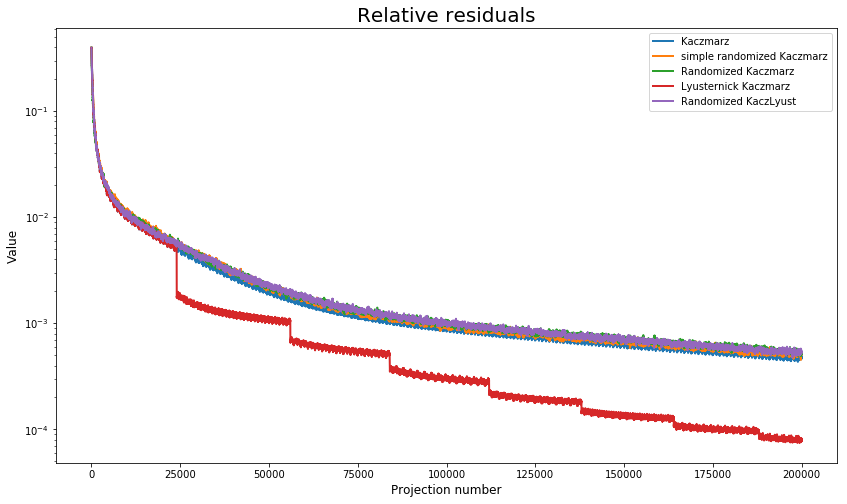

In [118]:
eps = 1e-10
N_max = 50000
x_Car,res_Car,t_Car = Kaczmarz(A,values,x_0,N_max,eps)
x_simple_rand,res_simple_rand,t_simple_rand = SimpleRandomKaczmarz(A,values,x_0,N_max,eps)
x_rand,res_rand,t_rand = RandomKaczmarz(A,values,x_0,N_max,eps)
answer = calculate(A,values,eps,N_max,x_0)
answer_rand = RandomizedKaсzLust(A,values,eps,N_max,x_0)
plt.figure(figsize=(14,8))
plt.plot(res_Car, linestyle = '-', linewidth = 2.0, label='Kaczmarz')
plt.plot(res_simple_rand, linestyle = '-', linewidth = 2.0, label='simple randomized Kaczmarz')
plt.plot(res_rand, linestyle = '-', linewidth = 2.0, label='Randomized Kaczmarz')
plt.plot(answer['info']['res'], linestyle = '-', linewidth = 2.0, label='Lyusternick Kaczmarz')
plt.plot(answer_rand['info']['res'], linestyle = '-', linewidth = 2.0, label='Randomized KaczLyust')
plt.title('Relative residuals', fontsize = 20)
plt.ylabel('Value', fontsize = 12)
plt.xlabel('Projection number', fontsize = 12)
plt.yscale('log')
plt.legend()
plt.show()

In [79]:
#sample size
m = 300
n = 100
np.random.seed(666)
true_coef = np.random.randn(n)
#generate function values:
A = np.random.randn(m,n)
values = A @ true_coef

In [110]:
def calculate(A,b,eps,maxIter,x0):
    '''Performs the main calculation procedure over the params.
    calculate(dict params, int testNo=None) -> dict answer
    '''
    # You can print a debug info onto the main screen
    
    answer = {}
    answer['info'] = {'calcTime': None, 'iterNum': None, 'res': None}
    startTime = time.time()
    iterNum = 1
    
    n = len(A)
    A = A.astype(float); b = b.astype(float)    # required for division
    # Norm each equation
    normCoef = np.transpose(np.sqrt(np.sum(A ** 2, 1)))
    A /= normCoef[:,None]
    b /= normCoef
    # Choosing random x0
    random.seed(None)   # inits with cur time or some dif-t random val
    x = np.copy(x_0)
    # using 2nd norm below (change to suit your needs)
    disparity = lambda x: LA.norm(b - np.dot(A, np.transpose(x)))/LA.norm(b)
    cosVectAngle = lambda a, b: np.inner(a, b) / LA.norm(a) / LA.norm(b)
    HPlane_Pnts = deque()
    lastVr = None
    q_last = None
    init_lastVr = False
    answer['info']['res'] = [disparity(x)]
    while iterNum < maxIter and disparity(x) >= eps:
        for i in range(n):
            t = A[i] @ x - b[i]
            x -= A[i] * t
            new_res = np.linalg.norm(A @ x - b)/np.linalg.norm(b)
            answer['info']['res'].append(new_res)
            if i == n - 1:
                HPlane_Pnts.append(np.copy(x))
        if len(HPlane_Pnts) > 3:
            HPlane_Pnts.popleft()
            #pprint(HPlane_Pnts)
            if not init_lastVr:
                prevVr = HPlane_Pnts[-2] - HPlane_Pnts[-3]
            else:
                prevVr = lastVr
            lastVr = HPlane_Pnts[-1] - HPlane_Pnts[-2]
            init_lastVr = True
            #print 'cos(angle): ', cosVectAngle(prevVr, lastVr)
            #if np.isclose(cosVectAngle(prevVr, lastVr), 1):
            
            q_prev = q_last
            q_last = LA.norm(lastVr) / \
                    LA.norm(prevVr)
            #print 'q_prev: {}, q_last: {} '.format(q_prev, q_last)
            if not (q_prev is None) and \
                q_last != 1 and \
                np.isclose(q_prev, q_last, rtol = 1e-2) and \
                np.isclose(cosVectAngle(prevVr, lastVr), 1, rtol = 1e-3):
                
                # Lyusternik acceleration
                print('accelerating; iterNum: %d, q_last: %f' % (iterNum, q_last))
                x = HPlane_Pnts[-1] + (HPlane_Pnts[-1] - HPlane_Pnts[-2]) / (1.0 - q_last)
                print('disparity of x: ', disparity(x))
                HPlane_Pnts.clear()
                
            #time.sleep(2)
        iterNum += n
    #add last residual
    new_res = np.linalg.norm(A @ x - b)/np.linalg.norm(b)
    answer['info']['res'].append(new_res)
    #end
    endTime = time.time()
    answer['x'] = x
    answer['info']['calcTime'] = endTime - startTime
    answer['info']['iterNum'] = iterNum
    answer['info']['disparity'] = disparity(x)
    if A.shape[0] == A.shape[1]:
        answer['info']['conditionNum'] = LA.norm(A) * LA.norm(LA.inv(A))
    else:
        answer['info']['conditionNum'] = 0
    return answer

In [107]:
def RandomizedKaсzLust(A,b,eps,maxIter,x0):
    '''Performs the main calculation procedure over the params.
    calculate(dict params, int testNo=None) -> dict answer
    '''
    # You can print a debug info onto the main screen
    
    answer = {}
    answer['info'] = {'calcTime': None, 'iterNum': None, 'res': None}
    startTime = time.time()
    iterNum = 1
    
    n = len(A)
    num_steps = 5*n
    print("num_steps = ",num_steps)
    A = A.astype(float); b = b.astype(float)    # required for division
    # Norm each equation
    normCoef = np.transpose(np.sqrt(np.sum(A ** 2, 1)))
    A /= normCoef[:,None]
    b /= normCoef
    # Choosing random x0
    random.seed(None)   # inits with cur time or some dif-t random val
    x = np.copy(x_0)
    # using 2nd norm below (change to suit your needs)
    disparity = lambda x: LA.norm(b - np.dot(A, np.transpose(x)))/LA.norm(b)
    cosVectAngle = lambda a, b: np.inner(a, b) / LA.norm(a) / LA.norm(b)
    HPlane_Pnts = deque()
    lastVr = None
    q_last = None
    init_lastVr = False
    answer['info']['res'] = [disparity(x)]
    while iterNum < maxIter and disparity(x) >= eps:
        for i in range(num_steps):
            k = np.random.randint(n)
            t = A[k] @ x - b[k]
            x -= A[k] * t
            new_res = np.linalg.norm(A @ x - b)/np.linalg.norm(b)
            answer['info']['res'].append(new_res)
            if i == num_steps - 1:
                HPlane_Pnts.append(np.copy(x))
        if len(HPlane_Pnts) > 3:
            HPlane_Pnts.popleft()
            #pprint(HPlane_Pnts)
            if not init_lastVr:
                prevVr = HPlane_Pnts[-2] - HPlane_Pnts[-3]
            else:
                prevVr = lastVr
            lastVr = HPlane_Pnts[-1] - HPlane_Pnts[-2]
            init_lastVr = True
            #print 'cos(angle): ', cosVectAngle(prevVr, lastVr)
            #if np.isclose(cosVectAngle(prevVr, lastVr), 1):
            
            q_prev = q_last
            q_last = LA.norm(lastVr) / \
                    LA.norm(prevVr)
            if not (q_prev is None):
                print('q_prev: %f, q_last: %f' % (q_prev, q_last))
            if not (q_prev is None) and \
                q_last != 1 and \
                np.isclose(q_prev, q_last, rtol = 1e-1) and \
                np.isclose(cosVectAngle(prevVr, lastVr), 1, rtol = 1e-1):
                
                # Lyusternik acceleration
                print('accelerating; iterNum: %d, q_last: %f' % (iterNum, q_last))
                x = HPlane_Pnts[-1] + (HPlane_Pnts[-1] - HPlane_Pnts[-2]) / (1.0 - q_last)
                print('disparity of x: ', disparity(x))
                HPlane_Pnts.clear()
                
            #time.sleep(2)
        iterNum += num_steps
    #add last residual
    new_res = np.linalg.norm(A @ x - b)/np.linalg.norm(b)
    answer['info']['res'].append(new_res)
    #end
    endTime = time.time()
    answer['x'] = x
    answer['info']['calcTime'] = endTime - startTime
    answer['info']['iterNum'] = iterNum
    answer['info']['disparity'] = disparity(x)
    if A.shape[0] == A.shape[1]:
        answer['info']['conditionNum'] = LA.norm(A) * LA.norm(LA.inv(A))
    else:
        answer['info']['conditionNum'] = 0
    return answer